In [1]:
import os  
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [2]:
import pathlib
import PIL
import PIL.Image
import numpy as np

In [3]:
data_dir = pathlib.Path('dataset')

In [5]:
NG_image_count = len(list(data_dir.glob('NG/*.jpg')))
OK_image_count = len(list(data_dir.glob('OK/*.jpg')))
print("NG_image_count:",NG_image_count)
print("OK_image_count",OK_image_count)

NG_image_count: 10
OK_image_count 90


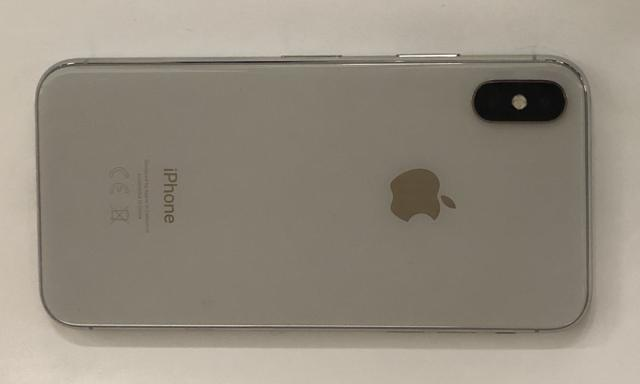

In [6]:
okimages = list(data_dir.glob('OK/*'))
PIL.Image.open(str(okimages[0]))

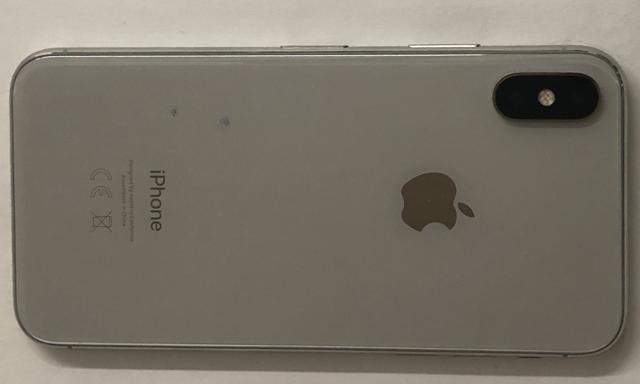

In [7]:
badimages = list(data_dir.glob('NG/*'))
PIL.Image.open(str(badimages[0]))

In [4]:
batch_size = 5
img_height = 224
img_width = 224

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 80 files for training.
Metal device set to: Apple M1


2022-06-11 22:52:34.354531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-11 22:52:34.354704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [7]:
class_names = train_ds.class_names
#print(class_names)

In [14]:
class_names

['NG', 'OK']

In [8]:
model = tf.keras.applications.MobileNet()

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.00030013593 0.95408165


2022-06-11 22:52:51.310371: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs=5
history = model.fit(
  normalized_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/Users/yiranxu/miniforge3/envs/tf26/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-06-11 22:54:27.171601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 2.2408 - accuracy: 0.7250

2022-06-11 22:54:29.355842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 105ms/step - loss: 2.2408 - accuracy: 0.7250 - val_loss: 6.3202 - val_accuracy: 0.0000e+00
Epoch 2/5
16/16 [==============================] - 1s 80ms/step - loss: 0.6249 - accuracy: 0.8250 - val_loss: 3.7458 - val_accuracy: 0.0000e+00
Epoch 3/5
16/16 [==============================] - 1s 80ms/step - loss: 0.0833 - accuracy: 0.9625 - val_loss: 2.1227 - val_accuracy: 0.3000
Epoch 4/5
16/16 [==============================] - 1s 80ms/step - loss: 0.1990 - accuracy: 0.9500 - val_loss: 0.7682 - val_accuracy: 0.9500
Epoch 5/5
16/16 [==============================] - 1s 80ms/step - loss: 0.0788 - accuracy: 0.9750 - val_loss: 1.2592 - val_accuracy: 0.8000


In [17]:
# save the model
model.save('my_model/1') 

INFO:tensorflow:Assets written to: my_model/1/assets


INFO:tensorflow:Assets written to: my_model/1/assets
